# Project 1

| Name         | PID          | 
|--------------|--------------|
| Peter Murphy | `petermurphy`|
|Joseph McAlister | `josephrm`|
|??? | `???`|
    
We have neither given nor received unauthorized assistance on this assignment. See the course sylabus for details on the Honor Code policy. In particular, sharing lines of solution code is prohibited.

- what country has the most suicides?
- is there a relationship between ~~generation/age~~ and propensity for suicide?
- relationship between gdp/suice, country/suicide
- year in review assoicated with suicide

In [2]:
# Imports and df display options
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
data = pd.read_csv('data/suicide_rates_master.csv')
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


1 - relation between year and mean suicide rate around the world?

2 - relation between gdp and suicide_rate per country

3 - relation between country and suicide_rate

in order to make this calculations, we need to build a reduced data set with the country, year, mean_suicide rate for each generaiton

Text(0, 0.5, 'number of suicides')

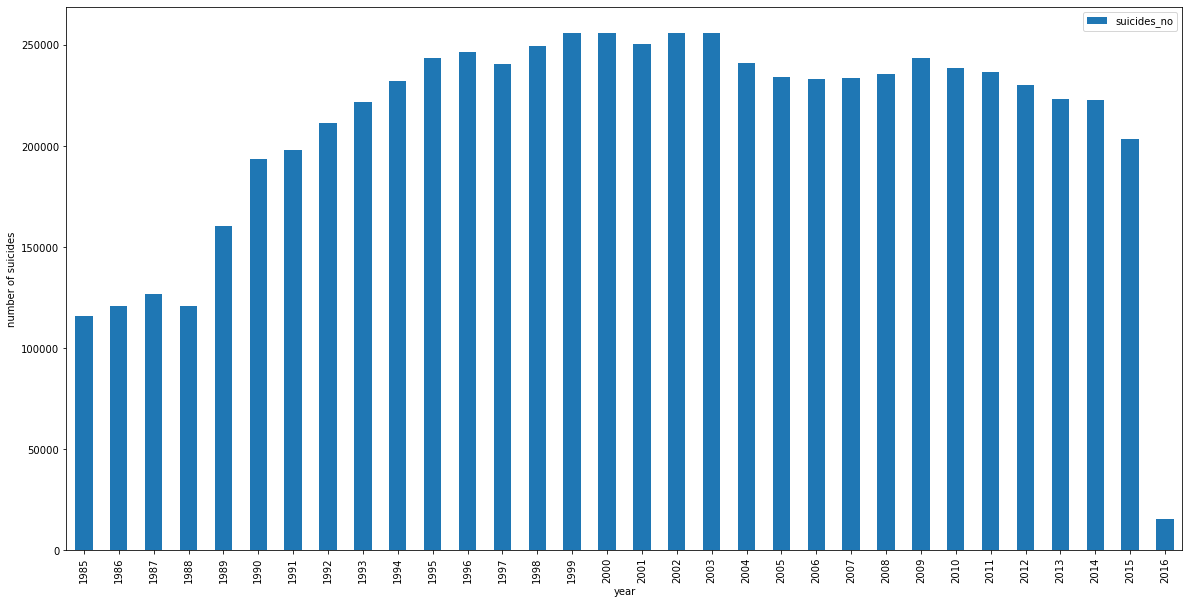

In [44]:
fig, ax = plt.subplots()
g = data.groupby('year')
deaths_by_year = pd.DataFrame(g['suicides_no'].sum()) 
deaths_by_year['year'] = deaths_by_year.index
# deaths_by_year.plot.scatter(x='year', y='suicides_no', ax=ax, s=140, figsize=(20,10))
deaths_by_year.plot.bar(x='year', y='suicides_no', ax=ax, figsize=(20,10))
ax.set_xlabel('year')
ax.set_ylabel('number of suicides')

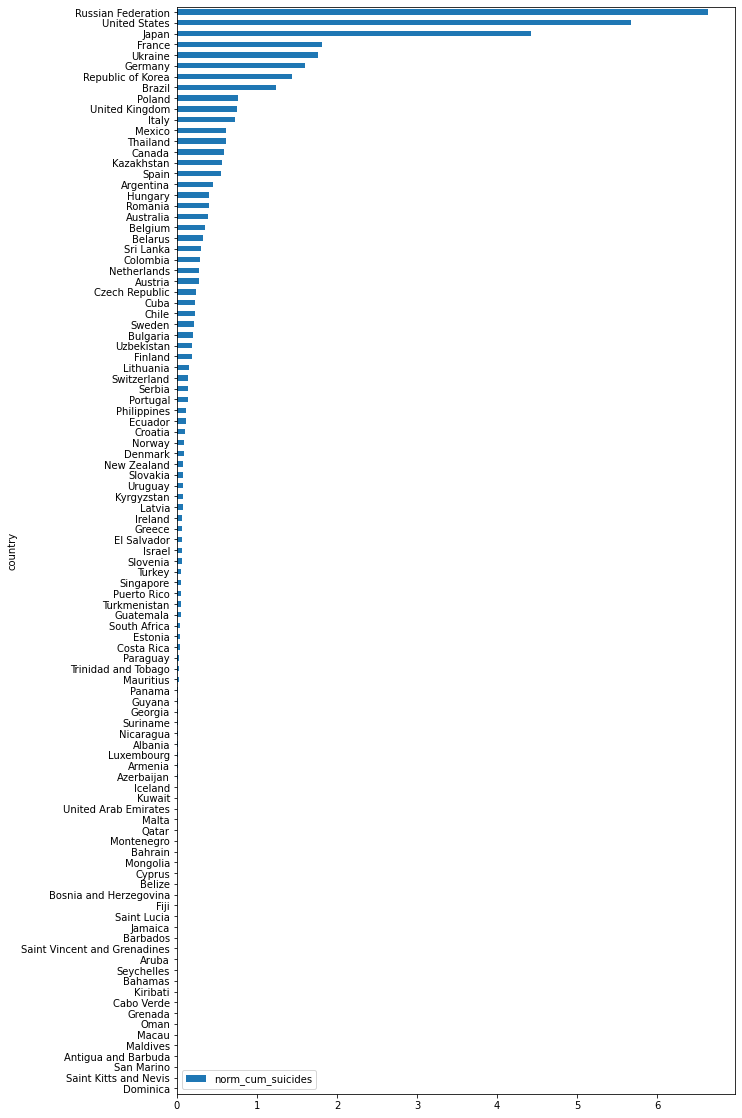

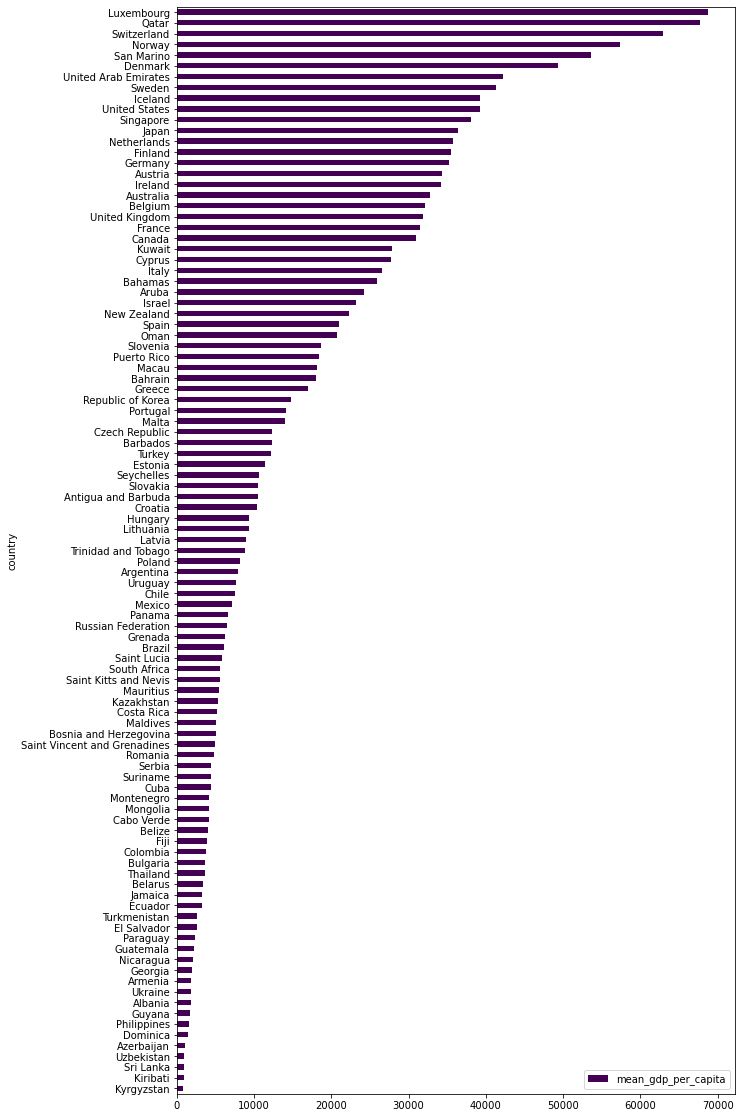

In [99]:
# plot the sum of suicides by country as a bar chart
fig, ax = plt.subplots()

reduced = pd.DataFrame()
reduced['cum_suicides'] = data.copy().groupby('country')['suicides_no'].sum()
reduced['norm_cum_suicides'] = (reduced['cum_suicides'] - reduced['cum_suicides'].mean()) / reduced['cum_suicides'].std()
reduced['norm_cum_suicides'] = reduced['norm_cum_suicides'] + abs(reduced['norm_cum_suicides'].min())
reduced['mean_gdp_per_capita'] = data.copy().groupby('country')['gdp_per_capita ($)'].mean()
# reduced['mean_gdp_per_yr'] = data.copy().groupby('country')['gdp_for_year ($)'].mean()

reduced = reduced.sort_values('cum_suicides', ascending=True)

#reduced.plot.barh(y='cum_suicides', figsize=(10,20), ax=ax)
# reduced.plot.barh(figsize=(10,20))
reduced.plot.barh(y='norm_cum_suicides', ax=ax, figsize=(10,20))
reduced = reduced.sort_values('mean_gdp_per_capita', ascending=True)
reduced.plot.barh(y='mean_gdp_per_capita', cmap='viridis', figsize=(10,20))

In [45]:
# other ways to plot data right off the bat

In [46]:
# imporrt year in review sentiment description